<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from tqdm import tqdm

In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15,n_clusters_per_class=2)

In [4]:
X.shape,y.shape

((5000, 5), (5000,))

In [5]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.40,stratify=y,random_state=42 )
x_cv,x_test,y_cv,y_test=train_test_split(X_test,Y_test,test_size=0.5,stratify=Y_test,random_state=42)
print('x_train',x_train.shape),print('y_train',y_train.shape)
print('x_cv',x_cv.shape),print('y_cv',y_cv.shape)
print('x_test',x_test.shape),print('y_test',y_test.shape)
#X_train,X_test,y_train,y_test

x_train (3000, 5)
y_train (3000,)
x_cv (1000, 5)
y_cv (1000,)
x_test (1000, 5)
y_test (1000,)


(None, None)

In [6]:
#standardising before applying svm for easy calcululation 
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_train= normalizer.fit_transform(x_train)
x_train.shape

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_cv= normalizer.fit_transform(x_cv)
x_cv.shape

from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
x_test= normalizer.fit_transform(x_test)
x_test.shape

(1000, 5)

In [7]:
from sklearn.svm import SVC
clf=SVC(C=100,gamma=0.001,kernel='rbf',decision_function_shape='ovo')
clf.fit(x_train,y_train)
print("support_vectors",clf.support_vectors_.shape)
#clf.dual_coef_.shape

support_vectors (667, 5)


In [8]:
print("decision_function output shape",clf.decision_function(x_cv).shape)
clf.decision_function(x_cv)[:5]
#clf.support_

decision_function output shape (1000,)


array([-3.0089086 ,  1.50715859,  1.99033718, -1.65137204,  2.21327284])

In [9]:
print("dual coeff shape",clf.dual_coef_.shape)
clf.dual_coef_[0][:5]

dual coeff shape (1, 667)


array([-100., -100., -100., -100., -100.])

In [10]:
print("support vector shape:",clf.support_vectors_.shape)#,clf.support_vectors_.shape)
print("\nintercept",clf.intercept_)
print("\nsupport vector shape:",clf.support_.shape)
print("\nnumber of support vectors each class:",clf.n_support_)
print("\ndual_coefficient:",clf.dual_coef_[0][:5])
print("\ndecision function:",clf.decision_function)
print(clf.decision_function_shape)
clf.decision_function(x_cv)[:5]

support vector shape: (667, 5)

intercept [-0.38312286]

support vector shape: (667,)

number of support vectors each class: [334 333]

dual_coefficient: [-100. -100. -100. -100. -100.]

decision function: <bound method BaseSVC.decision_function of SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>
ovo


array([-3.0089086 ,  1.50715859,  1.99033718, -1.65137204,  2.21327284])

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [11]:
clf.dual_coef_.shape,clf.intercept_,clf.support_vectors_.shape,clf.decision_function

((1, 667),
 array([-0.38312286]),
 (667, 5),
 <bound method BaseSVC.decision_function of SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)>)

In [12]:
#DECISION OUTPUT FOR CROSSVALIDATION Data y_cv
import math
from numpy import linalg as LA
alpha=clf.dual_coef_
decision_output_cv=list()
for j,q in enumerate(x_cv):
  sum=0
  for i,vector in enumerate(clf.support_vectors_):
    distance=LA.norm((vector - q))**2
    sum+= (alpha[0][i] * np.exp(-clf.gamma * distance))
  decision_output_cv.append((sum+clf.intercept_[0]))

decision_output_cv=np.array(decision_output_cv)
print("first five output of custom rbf svm:",decision_output_cv[:5])
print("first five output of sklearn rbf svm:",clf.decision_function(x_cv)[:5])

first five output of custom rbf svm: [-3.0089086   1.50715859  1.99033718 -1.65137204  2.21327284]
first five output of sklearn rbf svm: [-3.0089086   1.50715859  1.99033718 -1.65137204  2.21327284]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [14]:
#SGD FOR OPTIMISED WEIGHT AND BIAS TERM
import math
def sigmoid(z):
    sig_z = 1/(1+np.exp(-z))
    return sig_z

def logloss(y_true,y_pred,w,b):
  loss_new=0
  for index in range(len(y_true)):
    arg1=sigmoid(w*y_pred[index]+b)
    arg2=(1-arg1)+10e-6
    loss_new+=(y_true[index] * math.log10(arg1)+(1-y_true[index]) * math.log10(arg2))
    return -loss_new/len(y_true)

def gradient_dw(f,y,w,b,alpha,N):
    z= w*f + b
    dw=f*(y-sigmoid(z)) - alpha * w/N
    return dw    

def gradient_db(f,y,w,b):
  z= w*f + b
  db=y-sigmoid(z)
  return db  

In [15]:
#y_cv TO y_cv_modified 
a=y_train[y_train>0].sum()
b=len(y_train)-a 

y_cv_modified=[]
for i in range(len(y_cv)):
  if y_cv[i]>0:
    y_cv_modified.append((a+1)/(a+2))
  else:
     y_cv_modified.append(1/(b+2))
y_cv_modified=np.array(y_cv_modified)
y_cv_modified[:5]

array([4.77554919e-04, 9.98901099e-01, 9.98901099e-01, 4.77554919e-04,
       9.98901099e-01])

In [16]:
#TRAINING Y_CV DATA FOR OPTIMUM WEIGHTS
def train(X_train,y_train,epochs,alpha,eta0):

  log_loss=[]
  w,b=0,0
  for epoch in range(1,epochs):
    predicted=[]
    #print(w,b)
    for index in range(len(X_train)):    
      grad_w = gradient_dw(X_train[index],y_train[index],w,b,alpha,len(X_train))
      grad_b = gradient_db(X_train[index],y_train[index],w,b)
      w_new = w - eta0 * grad_w
      b_new = b - eta0 * grad_b
      w=w_new
      b=b_new

    for index in range(len(X_train)):
      z = w*X_train[index] + b
      #print(z)
      pred = round(sigmoid(z),4)
      #print(pred)
      predicted.append(pred)
    loss=logloss(y_train,predicted,w,b)
    #print(loss)
    log_loss.append(loss)
  return log_loss,w,b 

alpha=0.0001
eta0=0.0001
N=len(y_cv)
epochs=15
log_loss, w, b=train(X_train=decision_output_cv,y_train=y_cv_modified,epochs=epochs,alpha=alpha,eta0=eta0)
print('log_loss:',log_loss)
print('\nweights:',w)
print('\nbias_term:',b) 
    


log_loss: [0.00029472917991870247, 0.0002850351862144224, 0.00027169415079096625, 0.0002550772247146462, 0.00023616858663446993, 0.0002162431513620188, 0.0001964499297702085, 0.00017757353038414564, 0.0001600056522309149, 0.00014388041057592914, 0.00012913961004031613, 0.00011571812961184668, 0.00010354274121573929, 9.248736667688907e-05]

weights: -1.9398826478452782

bias_term: 0.4945787602900555


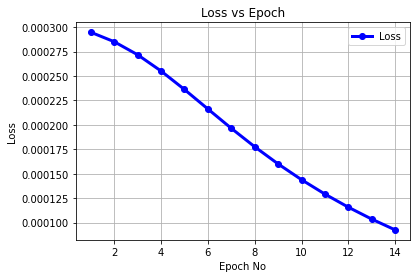

In [17]:
#PLOT LOSS VS EPOCH CURVE
import matplotlib.pyplot as plt
plt.grid()
plt.plot(np.arange(1,15),log_loss,'bo-',label='Loss',linewidth=3)
plt.xlabel('Epoch No')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

In [18]:
#DECISION OUTPUT FOR TEST DATA 
import math
from numpy import linalg as LA
alpha=clf.dual_coef_
y_test
gamma=0.01
decision_output_test=list()
for k,q in enumerate(x_test):
  sum=0
  for i,vector in enumerate(clf.support_vectors_):
    distance=LA.norm((vector - q))**2
    sum+= (alpha[0][i] * np.exp(-clf.gamma * distance))
  decision_output_test.append((sum+clf.intercept_[0]))

decision_output_test=np.array(decision_output_test)
decision_output_test[:10]

array([-1.73165594, -1.55001122, -1.14146176, -1.64442276,  0.53094865,
       -1.64735703,  1.85736746, -3.15382181,  1.7659252 ,  0.44147018])

In [19]:
#predicting probability for test set
prob_test=[]
for idx,point in enumerate(y_test):
  z= w*decision_output_test[idx] + b
  prob_test.append(sigmoid(z))
prob_test[:5]  

[0.9792408002756153,
 0.9707281063797637,
 0.937548639510268,
 0.975506903605909,
 0.3692584666461817]